<a href="https://colab.research.google.com/github/carnival77/Machine_Learning/blob/master/Assignment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. Plot the training data**



*   plot the training data points (x,y) with their labels lll in colors (blue for label 0 and red for label 1)


1. Training Data

* load the training data file ('data-nonlinear.txt')
* each row {(x(i),y(i),l(i))} of the data consists of a 2-dimensional point (x,y)(x, y)(x,y) with its label lll


* x,y∈R and l∈{0,1}



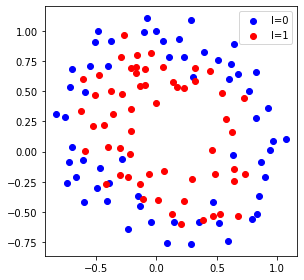

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import csv

data    = np.genfromtxt("/content/drive/My Drive/Colab Notebooks/assignment7/data-nonlinear.txt", delimiter=',')

x       = data[:, 0]
y       = data[:, 1]
label   = data[:, 2]

x_label0    = x[label == 0]
x_label1    = x[label == 1]

y_label0    = y[label == 0]
y_label1    = y[label == 1]

plt.scatter(x_label0, y_label0,label="l=0", c='b')
plt.scatter(x_label1, y_label1,label="l=1",c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.show()


#**2.Write down the high dimensional function g(x,y;θ)**



*   write down the equation for the non-linear function g(x,y;θ) used for the classifier in LaTeX format



2. Logistic regression



In [0]:
theta_k=[3.0 , 4.0 , 6.0 , 4.0 , 1.0 , 1.0, 1.0, 1.0 ]
f=[1 , x**3 * y ** 2 , y**2 , x**2 , y **2 , x*y , x , y ] 

$ z = g(x,y,\Theta) = 4x^3y^2 + 6y^2 + 4x^2 + y^2+ xy + x + y + 3 $

In [0]:
z = 0
for i in range(len(f)):
  z += theta_k[i]*f[i]

$ sigmoid : σ(z)=1/(1+exp(−z)) $

In [0]:
sigmoid1 = 1/(1+np.exp(-z1))

3. Objective Function

OF = objective function
$ J(θ)=m1​∑i=1m​(−l(i)log(σ(g(x(i),y(i);θ)))−(1−l(i))log(1−σ(g(x(i),y(i);θ)))) $

4. Gradient Descent

$ θk(t+1)​:=θ0(t)​−αm1​∑i=1m​(σ(g(x(i),y(i);θ))−l(i))∂θk​∂g(x(i),y(i);θ(t))​, for all k $

m = number of data

steps = 100000 번의 학습 사이클. 

learning_rate = 0.09

In [0]:
m = len(x)
steps = 100000
learning_rate = 0.09

n_theta = len(theta_k)

In [0]:
from sympy import Derivative, symbols

arr_theta_k=[]

for i in range(n_theta):
  arr_theta_k.append([])

arr_OF=[]

gradient_theta_k=[]

for i in range(n_theta):
  gradient_theta_k.append(0)

z1_label_1=[]
z1_label_0=[]

real_label_0 = len(x_label0)
real_label_1 = len(x_label1)

accutrate_rate_arr = []

for i in range(steps):
  z = 0
  for k in range(len(f)):
    z += theta_k[k]*f[k]
  sigmoid2 = 1/(1+np.exp(-z))

  OF = np.sum((-label * np.log10(sigmoid2)) - ((1-label) * np.log10(1-sigmoid2)))/(m)

  z_label_1=[]
  z_label_0=[]

  for j in range(len(z)):
    if(z[j]>=0):
      z_label_1.append(z[j])
    else:
      z_label_0.append(z[j])

  prediction_label_0 = len(z_label_0)
  prediction_label_1 = len(z_label_1)
  total_prediction = prediction_label_0 + prediction_label_1

  gap_label_0 = abs(real_label_0 - prediction_label_0)
  gap_label_1 = abs(real_label_1 - prediction_label_1)

  total_gap = gap_label_0 + gap_label_1
  
  correct_predictions = total_prediction - total_gap

  accurate_rate = correct_predictions / total_prediction * 100

  accutrate_rate_arr.append(accurate_rate)

  for i in range(n_theta):
    gradient_theta_k[i]=np.sum((sigmoid2 - label) * f[i])/m

  for i in range(n_theta):
    arr_theta_k[i].append(theta_k[i])

  arr_OF.append(OF)
  
  for i in range(n_theta):
    theta_k[i] -= learning_rate*gradient_theta_k[i]

#**3. Plot the training error**



*   plot the training error $J(θ)$ at every iteration of gradient descent until convergence (in blue color)



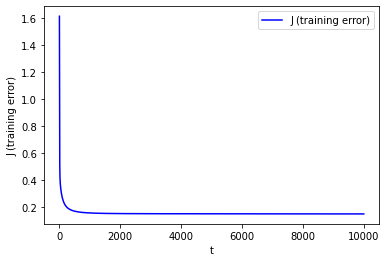

In [0]:
test5=np.array(arr_OF,dtype=float)

t=np.arange(0,10000,step=0.1)

plt.xlabel('t')
plt.ylabel('J (training error)')

plt.plot(t,test5,color="blue",label="J (training error)")

plt.legend()
plt.show()

#**4. Plot the training accuracy**



*   plot the training accuracy at every iteration of gradient descent until convergence (in red color)

*   the score will be given depending on the accuracy

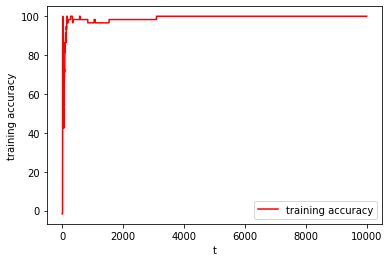

In [0]:
test=np.array(accutrate_rate_arr,dtype=float)

t=np.arange(0,10000,step=0.1)

plt.xlabel('t')
plt.ylabel('training accuracy')

plt.plot(t,test,color="red",label="training accuracy")

plt.legend()
plt.show()

#**5. Write down the final training accuracy**



*   present the final training accuracy in number (%) at convergence
*   the score will be given depending on the accuracy



In [0]:
print("accurate_rate : ",accurate_rate,"%")

accurate_rate :  100.0 %


final training accuracy = 100%

#**6. Plot the optimal classifier superimposed on the training data**



*   plot the boundary of the optimal classifier at convergence (in green color)

*   the boundary of the classifier is defined by ${(x,y)∣σ(g(x,y;θ))=0.5}$=${(x,y)∣g(x,y;θ)=0}$

*   plot the training data points (x,y) with their labels lll in colors superimposed on the illustration of the classifier (blue for label 0 and red for label 1)
*   you can use contour function in python3


*   the score will be given depending on the accuracy


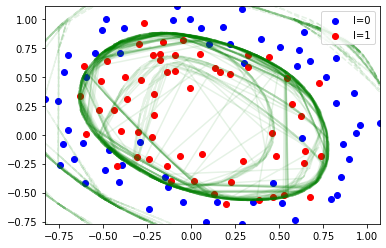

In [0]:
X,Y = np.meshgrid(x,y)

f2=[1 , X**3 * Y **2, Y**2 , X**2 , Y **2 , X*Y , X , Y]

z2 = 0
for i in range(len(f2)):
  z2 += theta_k[i]*f2[i]

plt.contour(x, y, z2, levels=4, colors="green",alpha=0.1)

plt.scatter(x_label0, y_label0,label="l=0", c='b')
plt.scatter(x_label1, y_label1,label="l=1", c='r')

plt.legend()
plt.show()

#**Result**

##**1. Plot the training data**

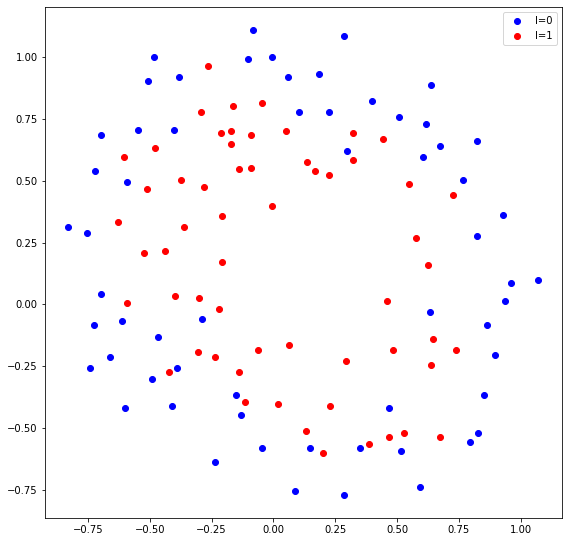

In [0]:
plt.figure(figsize=(8, 8))
plt.scatter(x_label0, y_label0,label="l=0", c='b')
plt.scatter(x_label1, y_label1,label="l=1",c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')

plt.legend()
plt.show()

##**2.Write down the high dimensional function $g(x,y;θ)$**

$g(x,y,\Theta) = 4x^3y^2 + 6y^2 + 4x^2 + y^2+ xy + x + y + 3 $

##**3. Plot the training error**

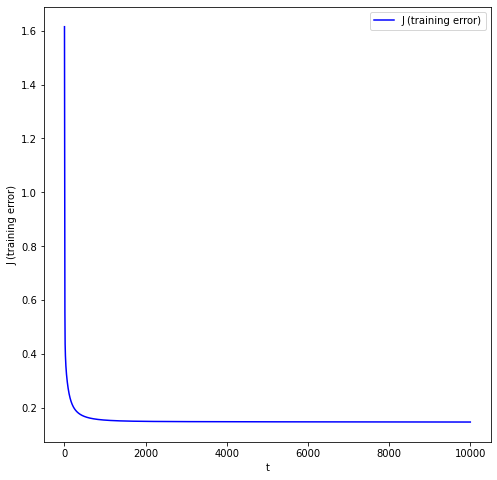

In [0]:
plt.figure(figsize=(8, 8))
plt.xlabel('t')
plt.ylabel('J (training error)')

plt.plot(t,test5,color="blue",label="J (training error)")

plt.legend()
plt.show()

##**4. Plot the training accuracy**

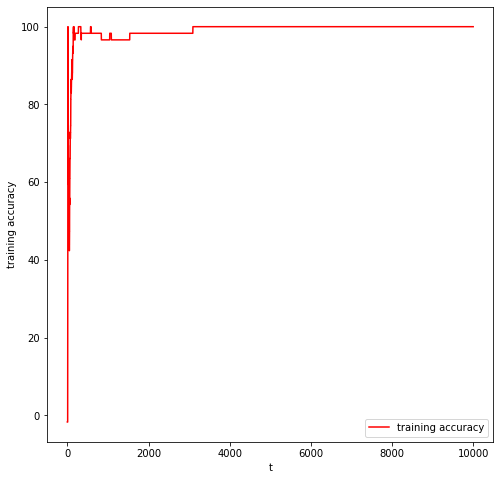

In [0]:
plt.figure(figsize=(8, 8))
plt.xlabel('t')
plt.ylabel('training accuracy')

plt.plot(t,test,color="red",label="training accuracy")

plt.legend()
plt.show()

##**5. Write down the final training accuracy**

final training accuracy = 100%

##**6. Plot the optimal classifier superimposed on the training data**

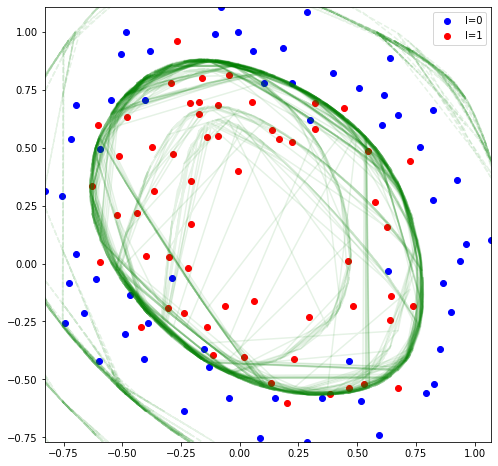

In [0]:
plt.figure(figsize=(8, 8))
plt.contour(x, y, z2, levels=4, colors="green",alpha=0.1)

plt.scatter(x_label0, y_label0,label="l=0", c='b')
plt.scatter(x_label1, y_label1,label="l=1", c='r')

plt.legend()
plt.show()